## 제주 빅데이터 경진대회
#### 이민혁
### Problem : 2020.04, 2020.07 기간 내 지역, 업종 별 월간 총 사용 금액 예측 
- 2019.01 ~ 2020.03 기간 내 카드 데이터, 201901-202003.csv (2.07 GB)
- 2020.04 기간 내 카드 데이터 (7/28 공개), 202004.csv (116 MB)
- 제출 양식, submission.csv (64 KB)


## 1. 라이브러리, 데이터 불러오기

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

from catboost import CatBoostRegressor, Pool
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('201901-202003.csv')
data2 = pd.read_csv('202004.csv')
df = pd.concat([data, data2])

In [3]:
df

REG_YYMM CARD_SIDO_NM CARD_CCG_NM    STD_CLSS_NM HOM_SIDO_NM  \
0          201901           강원         강릉시     건강보조식품 소매업          강원   
1          201901           강원         강릉시     건강보조식품 소매업          강원   
2          201901           강원         강릉시     건강보조식품 소매업          강원   
3          201901           강원         강릉시     건강보조식품 소매업          강원   
4          201901           강원         강릉시     건강보조식품 소매업          강원   
5          201901           강원         강릉시     건강보조식품 소매업          강원   
6          201901           강원         강릉시     건강보조식품 소매업          강원   
7          201901           강원         강릉시     건강보조식품 소매업          강원   
8          201901           강원         강릉시     건강보조식품 소매업          강원   
9          201901           강원         강릉시     건강보조식품 소매업          강원   
10         201901           강원         강릉시     건강보조식품 소매업          강원   
11         201901           강원         강릉시     건강보조식품 소매업          강원   
12         201901           강원         강릉시     건강보조식품 소매업          강원   
13         201901           강원         강릉시        골프장 운영업          강원   
14         201901           강원         강릉시        골프장 운영업          강원   
15         201901           강원         강릉시        골프장 운영업          강원   
16         201901           강원         강릉시        골프장 운영업          강원   
17         201901           강원         강릉시        골프장 운영업          강원   
18         201901           강원         강릉시        골프장 운영업          강원   
19         201901           강원         강릉시        골프장 운영업          강원   
20         201901           강원         강릉시        골프장 운영업          강원   
21         201901           강원         강릉시        골프장 운영업          강원   
22         201901           강원         강릉시        골프장 운영업          강원   
23         201901           강원         강릉시        골프장 운영업          강원   
24         201901           강원         강릉시        골프장 운영업          강원   
25         201901           강원         강릉시        골프장 운영업          경기   
26         201901           강원         강릉시        골프장 운영업          경기   
27         201901           강원         강릉시        골프장 운영업          경기   
28         201901           강원         강릉시        골프장 운영업          경기   
29         201901           강원         강릉시        골프장 운영업          경기   
...           ...          ...         ...            ...         ...   
1350292    202004           충북         충주시            호텔업          충북   
1350293    202004           충북         충주시            호텔업          충북   
1350294    202004           충북         충주시            호텔업          충북   
1350295    202004           충북         충주시            호텔업          충북   
1350296    202004           충북         충주시            호텔업          충북   
1350297    202004           충북         충주시  화장품 및 방향제 소매업          충북   
1350298    202004           충북         충주시  화장품 및 방향제 소매업          충북   
1350299    202004           충북         충주시  화장품 및 방향제 소매업          충북   
1350300    202004           충북         충주시  화장품 및 방향제 소매업          충북   
1350301    202004           충북         충주시  화장품 및 방향제 소매업          충북   
1350302    202004           충북         충주시  화장품 및 방향제 소매업          충북   
1350303    202004           충북         충주시  화장품 및 방향제 소매업          충북   
1350304    202004           충북         충주시  화장품 및 방향제 소매업          충북   
1350305    202004           충북         충주시  화장품 및 방향제 소매업          충북   
1350306    202004           충북         충주시  화장품 및 방향제 소매업          충북   
1350307    202004           충북         충주시  화장품 및 방향제 소매업          충북   
1350308    202004           충북         충주시  화장품 및 방향제 소매업          충북   
1350309    202004           충북         충주시  화장품 및 방향제 소매업          충북   
1350310    202004           충북         충주시  화장품 및 방향제 소매업          충북   
1350311    202004           충북         충주시  화장품 및 방향제 소매업          충북   
1350312    202004           충북         충주시  화장품 및 방향제 소매업          충북   
1350313    202004           충북         충주시  화장품 및 방향제 소매업          충북   
1350314    202004           충북         충주시  화장품 및 방향제 소매업          

**데이터 설명**

REG__YYMM = 년월

CARD_SIDO_NM = 카드이용지역_시도 (가맹점 주소 기준)

CARD_CCG_NM = 카드이용지역_시군구 (가맹점 주소 기준)

STD_CLSS_NM = 업종명

HOM_SIDO_NM = 거주지역_시도 (고객 집주소 기준)

HOM_CCG_NM = 거주지역_시군구 (고객 집주소 기준)

AGE = 연령대

SEX_CTGO_CD = 성별 (1: 남성, 2: 여성)

FLC = 가구생애주기 (1: 1인가구, 2: 영유아자녀가구, 3: 중고생자녀가구, 4: 성인자녀가구, 5: 노년가구)

CSTMR_CNT = 이용고객수 (명)

AMT = 이용금액 (원)

CNT = 이용건수 (건)

## 2. EDA

#### 1) 결측값 확인

In [4]:
df.isnull().sum()

REG_YYMM             0
CARD_SIDO_NM         0
CARD_CCG_NM      92371
STD_CLSS_NM          0
HOM_SIDO_NM          0
HOM_CCG_NM      155234
AGE                  0
SEX_CTGO_CD          0
FLC                  0
CSTMR_CNT            0
AMT                  0
CNT                  0
dtype: int64

시군구 지역의 결측 값들이 존재한다.

In [5]:
df[df['HOM_CCG_NM'].isnull()]

REG_YYMM CARD_SIDO_NM CARD_CCG_NM            STD_CLSS_NM HOM_SIDO_NM  \
420        201901           강원         강릉시            과실 및 채소 소매업          세종   
421        201901           강원         강릉시            과실 및 채소 소매업          세종   
1189       201901           강원         강릉시           기타 대형 종합 소매업          세종   
1190       201901           강원         강릉시           기타 대형 종합 소매업          세종   
1191       201901           강원         강릉시           기타 대형 종합 소매업          세종   
2424       201901           강원         강릉시               비알콜 음료점업          세종   
2425       201901           강원         강릉시               비알콜 음료점업          세종   
2426       201901           강원         강릉시               비알콜 음료점업          세종   
2427       201901           강원         강릉시               비알콜 음료점업          세종   
2428       201901           강원         강릉시               비알콜 음료점업          세종   
2429       201901           강원         강릉시               비알콜 음료점업          세종   
2430       201901           강원         강릉시               비알콜 음료점업          세종   
3668       201901           강원         강릉시               서양식 음식점업          세종   
3669       201901           강원         강릉시               서양식 음식점업          세종   
3670       201901           강원         강릉시               서양식 음식점업          세종   
3671       201901           강원         강릉시               서양식 음식점업          세종   
3672       201901           강원         강릉시               서양식 음식점업          세종   
3673       201901           강원         강릉시               서양식 음식점업          세종   
4301       201901           강원         강릉시                수산물 소매업          세종   
4302       201901           강원         강릉시                수산물 소매업          세종   
4303       201901           강원         강릉시                수산물 소매업          세종   
5331       201901           강원         강릉시                    여관업          세종   
5332       201901           강원         강릉시                    여관업          세종   
5333       201901           강원         강릉시                    여관업          세종   
6026       201901           강원         강릉시                일식 음식점업          세종   
6412       201901           강원         강릉시                중식 음식점업          세종   
7122       201901           강원         강릉시            차량용 주유소 운영업          세종   
8331       201901           강원         강릉시                체인화 편의점          세종   
8332       201901           강원         강릉시                체인화 편의점          세종   
8333       201901           강원         강릉시                체인화 편의점          세종   
...           ...          ...         ...                    ...         ...   
1345631    202004           충북         충주시          기타음식료품위주종합소매업          세종   
1345895    202004           충북         충주시               비알콜 음료점업          세종   
1345896    202004           충북         충주시               비알콜 음료점업          세종   
1346183    202004           충북         충주시            빵 및 과자류 소매업          세종   
1346184    202004           충북         충주시            빵 및 과자류 소매업          세종   
1346185    202004           충북         충주시            빵 및 과자류 소매업          세종   
1346186    202004           충북         충주시            빵 및 과자류 소매업          세종   
1346187    202004           충북         충주시            빵 및 과자류 소매업          세종   
1346551    202004           충북         충주시                   슈퍼마켓          세종   
1346654    202004           충북         충주시     스포츠 및 레크레이션 용품 임대업          세종   
1347687    202004           충북         충주시            차량용 주유소 운영업          세종   
1347688    202004           충북         충주시            차량용 주유소 운영업          세종   
1347689    202004           충북         충주시            차량용 주유소 운영업          세종   
1347690    202004           충북         충주시            차량용 주유소 운영업          세종   
1348289    202004           충북         충주시                체인화 편의점          세종   
1348290    202004           충북         충주시                체인화 편의점          세종   
1348291    202004           충북         충주시                체인화 편의점          세종   
1348292    202004           충북         충

In [6]:
df[df['CARD_CCG_NM'].isnull()]

REG_YYMM CARD_SIDO_NM CARD_CCG_NM    STD_CLSS_NM HOM_SIDO_NM  \
1243710    201901           세종         NaN     건강보조식품 소매업          세종   
1243711    201901           세종         NaN     건강보조식품 소매업          세종   
1243712    201901           세종         NaN     건강보조식품 소매업          세종   
1243713    201901           세종         NaN     건강보조식품 소매업          세종   
1243714    201901           세종         NaN     건강보조식품 소매업          세종   
1243715    201901           세종         NaN     건강보조식품 소매업          세종   
1243716    201901           세종         NaN     건강보조식품 소매업          세종   
1243717    201901           세종         NaN     건강보조식품 소매업          세종   
1243718    201901           세종         NaN     건강보조식품 소매업          세종   
1243719    201901           세종         NaN     건강보조식품 소매업          충북   
1243720    201901           세종         NaN        골프장 운영업          경기   
1243721    201901           세종         NaN        골프장 운영업          대전   
1243722    201901           세종         NaN        골프장 운영업          대전   
1243723    201901           세종         NaN        골프장 운영업          대전   
1243724    201901           세종         NaN        골프장 운영업          대전   
1243725    201901           세종         NaN        골프장 운영업          대전   
1243726    201901           세종         NaN        골프장 운영업          대전   
1243727    201901           세종         NaN        골프장 운영업          대전   
1243728    201901           세종         NaN        골프장 운영업          대전   
1243729    201901           세종         NaN        골프장 운영업          대전   
1243730    201901           세종         NaN        골프장 운영업          대전   
1243731    201901           세종         NaN        골프장 운영업          대전   
1243732    201901           세종         NaN        골프장 운영업          대전   
1243733    201901           세종         NaN        골프장 운영업          대전   
1243734    201901           세종         NaN        골프장 운영업          대전   
1243735    201901           세종         NaN        골프장 운영업          대전   
1243736    201901           세종         NaN        골프장 운영업          대전   
1243737    201901           세종         NaN        골프장 운영업          대전   
1243738    201901           세종         NaN        골프장 운영업          대전   
1243739    201901           세종         NaN        골프장 운영업          세종   
...           ...          ...         ...            ...         ...   
1040824    202004           세종         NaN  화장품 및 방향제 소매업          세종   
1040825    202004           세종         NaN  화장품 및 방향제 소매업          세종   
1040826    202004           세종         NaN  화장품 및 방향제 소매업          세종   
1040827    202004           세종         NaN  화장품 및 방향제 소매업          세종   
1040828    202004           세종         NaN  화장품 및 방향제 소매업          세종   
1040829    202004           세종         NaN  화장품 및 방향제 소매업          세종   
1040830    202004           세종         NaN  화장품 및 방향제 소매업          세종   
1040831    202004           세종         NaN  화장품 및 방향제 소매업          세종   
1040832    202004           세종         NaN  화장품 및 방향제 소매업          세종   
1040833    202004           세종         NaN  화장품 및 방향제 소매업          세종   
1040834    202004           세종         NaN  화장품 및 방향제 소매업          세종   
1040835    202004           세종         NaN  화장품 및 방향제 소매업          세종   
1040836    202004           세종         NaN  화장품 및 방향제 소매업          세종   
1040837    202004           세종         NaN  화장품 및 방향제 소매업          세종   
1040838    202004           세종         NaN  화장품 및 방향제 소매업          세종   
1040839    202004           세종         NaN  화장품 및 방향제 소매업          세종   
1040840    202004           세종         NaN  화장품 및 방향제 소매업          세종   
1040841    202004           세종         NaN  화장품 및 방향제 소매업          세종   
1040842    202004           세종         NaN  화장품 및 방향제 소매업          세종   
1040843    202004           세종         NaN  화장품 및 방향제 소매업          세종   
1040844    202004           세종         NaN  화장품 및 방향제 소매업          세종   
1040845    202004           세종         NaN  화장품 및 방향제 소매업          충남   
1040846    202004           세종         NaN  화장품 및 방향제 소매업          

* 확인 결과 결측 값들은 세종시의 데이터이다.
* 세종시는 따로 시나 구가 존재하지 않기 때문이다.
* 따라서 새로운 시를 만들어서 하나의 그룹을 만들어 준다. 

In [4]:
df["CARD_CCG_NM"].fillna("세종시", inplace=True)
df["HOM_CCG_NM"].fillna("세종시", inplace=True)
df.isnull().sum()

REG_YYMM        0
CARD_SIDO_NM    0
CARD_CCG_NM     0
STD_CLSS_NM     0
HOM_SIDO_NM     0
HOM_CCG_NM      0
AGE             0
SEX_CTGO_CD     0
FLC             0
CSTMR_CNT       0
AMT             0
CNT             0
dtype: int64

**결측 값이 완전히 제거되었다**

#### 2) 날짜 처리

In [5]:
df['REG_YYMM'] = df['REG_YYMM'].astype(str)
df['REG_YYMM'] = df['REG_YYMM'].str[0:4] + "-" + df['REG_YYMM'].str[4:]
df['REG_YYMM'] = df['REG_YYMM'].astype('datetime64[ns]')
df

REG_YYMM CARD_SIDO_NM CARD_CCG_NM    STD_CLSS_NM HOM_SIDO_NM  \
0       2019-01-01           강원         강릉시     건강보조식품 소매업          강원   
1       2019-01-01           강원         강릉시     건강보조식품 소매업          강원   
2       2019-01-01           강원         강릉시     건강보조식품 소매업          강원   
3       2019-01-01           강원         강릉시     건강보조식품 소매업          강원   
4       2019-01-01           강원         강릉시     건강보조식품 소매업          강원   
5       2019-01-01           강원         강릉시     건강보조식품 소매업          강원   
6       2019-01-01           강원         강릉시     건강보조식품 소매업          강원   
7       2019-01-01           강원         강릉시     건강보조식품 소매업          강원   
8       2019-01-01           강원         강릉시     건강보조식품 소매업          강원   
9       2019-01-01           강원         강릉시     건강보조식품 소매업          강원   
10      2019-01-01           강원         강릉시     건강보조식품 소매업          강원   
11      2019-01-01           강원         강릉시     건강보조식품 소매업          강원   
12      2019-01-01           강원         강릉시     건강보조식품 소매업          강원   
13      2019-01-01           강원         강릉시        골프장 운영업          강원   
14      2019-01-01           강원         강릉시        골프장 운영업          강원   
15      2019-01-01           강원         강릉시        골프장 운영업          강원   
16      2019-01-01           강원         강릉시        골프장 운영업          강원   
17      2019-01-01           강원         강릉시        골프장 운영업          강원   
18      2019-01-01           강원         강릉시        골프장 운영업          강원   
19      2019-01-01           강원         강릉시        골프장 운영업          강원   
20      2019-01-01           강원         강릉시        골프장 운영업          강원   
21      2019-01-01           강원         강릉시        골프장 운영업          강원   
22      2019-01-01           강원         강릉시        골프장 운영업          강원   
23      2019-01-01           강원         강릉시        골프장 운영업          강원   
24      2019-01-01           강원         강릉시        골프장 운영업          강원   
25      2019-01-01           강원         강릉시        골프장 운영업          경기   
26      2019-01-01           강원         강릉시        골프장 운영업          경기   
27      2019-01-01           강원         강릉시        골프장 운영업          경기   
28      2019-01-01           강원         강릉시        골프장 운영업          경기   
29      2019-01-01           강원         강릉시        골프장 운영업          경기   
...            ...          ...         ...            ...         ...   
1350292 2020-04-01           충북         충주시            호텔업          충북   
1350293 2020-04-01           충북         충주시            호텔업          충북   
1350294 2020-04-01           충북         충주시            호텔업          충북   
1350295 2020-04-01           충북         충주시            호텔업          충북   
1350296 2020-04-01           충북         충주시            호텔업          충북   
1350297 2020-04-01           충북         충주시  화장품 및 방향제 소매업          충북   
1350298 2020-04-01           충북         충주시  화장품 및 방향제 소매업          충북   
1350299 2020-04-01           충북         충주시  화장품 및 방향제 소매업          충북   
1350300 2020-04-01           충북         충주시  화장품 및 방향제 소매업          충북   
1350301 2020-04-01           충북         충주시  화장품 및 방향제 소매업          충북   
1350302 2020-04-01           충북         충주시  화장품 및 방향제 소매업          충북   
1350303 2020-04-01           충북         충주시  화장품 및 방향제 소매업          충북   
1350304 2020-04-01           충북         충주시  화장품 및 방향제 소매업          충북   
1350305 2020-04-01           충북         충주시  화장품 및 방향제 소매업          충북   
1350306 2020-04-01           충북         충주시  화장품 및 방향제 소매업          충북   
1350307 2020-04-01           충북         충주시  화장품 및 방향제 소매업          충북   
1350308 2020-04-01           충북         충주시  화장품 및 방향제 소매업          충북   
1350309 2020-04-01           충북         충주시  화장품 및 방향제 소매업          충북   
1350310 2020-04-01           충북         충주시  화장품 및 방향제 소매업          충북   
1350311 2020-04-01           충북         충주시  화장품 및 방향제 소매업          충북   
1350312 2020-04-01           충북         충주시  화장품 및 방향제 소매업          충북   
1350313 2020-04-01           충북         충주시  화장품 및 방향제 소매업          충북   
1350314 2020-0

#### 3) 상관관계 분석

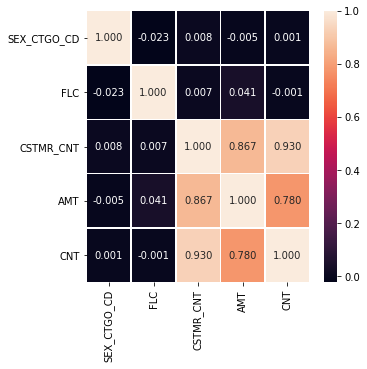

In [6]:
plt.figure(figsize=(5,5))
sns.heatmap(data = df.corr(), annot=True, 
fmt = '.3f', linewidths=.5)

분석 결과 CSTMR_CNT와 CNT를 제외한 변수들은 AMT와의 상관도가 낮다.

In [7]:
DF = df.copy() 
DF = DF.drop(['HOM_SIDO_NM','CARD_CCG_NM','HOM_CCG_NM','AGE','SEX_CTGO_CD', 'FLC','CSTMR_CNT','CNT'], axis=1)

In [11]:
DF

REG_YYMM CARD_SIDO_NM    STD_CLSS_NM       AMT
0       2019-01-01           강원     건강보조식품 소매업    311200
1       2019-01-01           강원     건강보조식품 소매업   1374500
2       2019-01-01           강원     건강보조식품 소매업    818700
3       2019-01-01           강원     건강보조식품 소매업   1717000
4       2019-01-01           강원     건강보조식품 소매업   1047300
5       2019-01-01           강원     건강보조식품 소매업    627500
6       2019-01-01           강원     건강보조식품 소매업   3690830
7       2019-01-01           강원     건강보조식품 소매업   3573300
8       2019-01-01           강원     건강보조식품 소매업   1433500
9       2019-01-01           강원     건강보조식품 소매업   7194600
10      2019-01-01           강원     건강보조식품 소매업    660000
11      2019-01-01           강원     건강보조식품 소매업   1554750
12      2019-01-01           강원     건강보조식품 소매업     24000
13      2019-01-01           강원        골프장 운영업   3112350
14      2019-01-01           강원        골프장 운영업    976300
15      2019-01-01           강원        골프장 운영업    101200
16      2019-01-01           강원        골프장 운영업   7630550
17      2019-01-01           강원        골프장 운영업    861800
18      2019-01-01           강원        골프장 운영업   3633700
19      2019-01-01           강원        골프장 운영업   1851700
20      2019-01-01           강원        골프장 운영업   2130300
21      2019-01-01           강원        골프장 운영업    623300
22      2019-01-01           강원        골프장 운영업    205900
23      2019-01-01           강원        골프장 운영업    755500
24      2019-01-01           강원        골프장 운영업    169900
25      2019-01-01           강원        골프장 운영업    255100
26      2019-01-01           강원        골프장 운영업    910900
27      2019-01-01           강원        골프장 운영업    358200
28      2019-01-01           강원        골프장 운영업    561300
29      2019-01-01           강원        골프장 운영업    779800
...            ...          ...            ...       ...
1350292 2020-04-01           충북            호텔업    843000
1350293 2020-04-01           충북            호텔업   1849700
1350294 2020-04-01           충북            호텔업    996000
1350295 2020-04-01           충북            호텔업    409000
1350296 2020-04-01           충북            호텔업    403000
1350297 2020-04-01           충북  화장품 및 방향제 소매업    602000
1350298 2020-04-01           충북  화장품 및 방향제 소매업     53900
1350299 2020-04-01           충북  화장품 및 방향제 소매업   1289100
1350300 2020-04-01           충북  화장품 및 방향제 소매업    925900
1350301 2020-04-01           충북  화장품 및 방향제 소매업    392750
1350302 2020-04-01           충북  화장품 및 방향제 소매업    149200
1350303 2020-04-01           충북  화장품 및 방향제 소매업   3635210
1350304 2020-04-01           충북  화장품 및 방향제 소매업   2090230
1350305 2020-04-01           충북  화장품 및 방향제 소매업    287000
1350306 2020-04-01           충북  화장품 및 방향제 소매업   2151440
1350307 2020-04-01           충북  화장품 및 방향제 소매업   1470100
1350308 2020-04-01           충북  화장품 및 방향제 소매업    319300
1350309 2020-04-01           충북  화장품 및 방향제 소매업   4086820
1350310 2020-04-01           충북  화장품 및 방향제 소매업   1457560
1350311 2020-04-01           충북  화장품 및 방향제 소매업   4667900
1350312 2020-04-01           충북  화장품 및 방향제 소매업  11757000
1350313 2020-04-01           충북  화장품 및 방향제 소매업   3066220
1350314 2020-04-01           충북  화장품 및 방향제 소매업  11309840
1350315 2020-04-01           충북  화장품 및 방향제 소매업    600600
1350316 2020-04-01           충북  화장품 및 방향제 소매업   3939900
1350317 2020-04-01           충북       휴양콘도 운영업     77000
1350318 2020-04-01           충북       휴양콘도 운영업     92000
1350319 2020-04-01           충북       휴양콘도 운영업    193000
1350320 2020-04-01           충북       휴양콘도 운영업     86000
1350321 2020-04-01           충북       휴양콘도 운영업    227000

[26048114 rows x 4 columns]

#### 4) 이상한 데이터 제거

In [8]:
DF[DF['AMT']<2000]

REG_YYMM CARD_SIDO_NM            STD_CLSS_NM   AMT
234726   2019-01-01           경기           기타 대형 종합 소매업   900
877390   2019-01-01           서울              내항 여객 운송업   500
1001180  2019-01-01           서울                수산물 소매업  1000
1423635  2019-01-01           전북     스포츠 및 레크레이션 용품 임대업    40
1423637  2019-01-01           전북     스포츠 및 레크레이션 용품 임대업    90
1423638  2019-01-01           전북     스포츠 및 레크레이션 용품 임대업    60
1520405  2019-01-01           충남     스포츠 및 레크레이션 용품 임대업  1000
2074383  2019-02-01           경남           기타 대형 종합 소매업  1920
2655731  2019-02-01           서울                   여행사업  1380
2804096  2019-02-01           서울                    여관업    40
3069627  2019-02-01           제주              정기 항공 운송업  1800
3598519  2019-03-01           경기                   슈퍼마켓  1350
4103195  2019-03-01           서울              내항 여객 운송업  1000
4104017  2019-03-01           서울              내항 여객 운송업  1200
4295977  2019-03-01           서울                   여행사업  1960
5733556  2019-04-01           서울          화장품 및 방향제 소매업  1200
5778575  2019-04-01           서울          기타음식료품위주종합소매업   150
6315860  2019-04-01           전북     스포츠 및 레크레이션 용품 임대업    60
6379487  2019-04-01           제주              정기 항공 운송업   100
6616671  2019-05-01           경기           기타 대형 종합 소매업  1600
7481729  2019-05-01           서울              내항 여객 운송업  1500
7904427  2019-05-01           인천           기타 대형 종합 소매업   420
8996940  2019-06-01           대전     스포츠 및 레크레이션 용품 임대업   900
9011202  2019-06-01           대전           기타 대형 종합 소매업   730
9239367  2019-06-01           서울  피자 햄버거 샌드위치 및 유사 음식점업  1600
9446293  2019-06-01           서울           그외 기타 종합 소매업   300
9859978  2019-06-01           제주              정기 항공 운송업   400
10245109 2019-07-01           경기                체인화 편의점  1970
10898817 2019-07-01           서울                    면세점  1572
11013806 2019-07-01           서울                 버스 운송업   900
...             ...          ...                    ...   ...
18005844 2019-11-01           서울  피자 햄버거 샌드위치 및 유사 음식점업  1800
18203011 2019-11-01           서울           그외 기타 종합 소매업   400
18203012 2019-11-01           서울           그외 기타 종합 소매업   300
18203020 2019-11-01           서울           그외 기타 종합 소매업   300
18535834 2019-11-01           전북            차량용 주유소 운영업    30
18542143 2019-11-01           전북     스포츠 및 레크레이션 용품 임대업    80
18542144 2019-11-01           전북     스포츠 및 레크레이션 용품 임대업    30
18899333 2019-12-01           경기           기타 대형 종합 소매업   120
18955766 2019-12-01           경기           기타 대형 종합 소매업   250
18988933 2019-12-01           경기           기타 대형 종합 소매업  1920
19061480 2019-12-01           경기           기타 대형 종합 소매업   440
19392620 2019-12-01           대구           기타 대형 종합 소매업  1640
19852476 2019-12-01           서울                   여행사업  1960
19924677 2019-12-01           서울           기타 대형 종합 소매업  1000
20013698 2019-12-01           서울     스포츠 및 레크레이션 용품 임대업  1900
21751482 2020-01-01           인천            빵 및 과자류 소매업  1900
22157083 2020-02-01           강원               휴양콘도 운영업  1820
22490648 2020-02-01           경남             건강보조식품 소매업  1950
22973798 2020-02-01           서울  피자 햄버거 샌드위치 및 유사 음식점업  1500
23107757 2020-02-01           서울           그외 기타 종합 소매업   400
23108661 2020-02-01           서울           그외 기타 종합 소매업   400
23122398 2020-02-01           서울                   여행사업  1000
23333552 2020-02-01           제주              정기 항공 운송업  1400
23698536 2020-03-01           경기                   슈퍼마켓   730
24069417 2020-03-01           서울           그외 기타 종합 소매업   200
24126444 2020-03-01           서울  피자 햄버거 샌드위치 및 유사 음식점업  1600
24593106 2020-03-01           제주              정기 항공 운송업   300
63288    2020-04-01           경기           기타 대형 종합 소매업  1230
780409   2020-04-01           서울           그외 기타 종합 소매업  1600
1185267  2020-04-01           전북            차량용 주유소 운영업    30

[94 rows x 4 columns]

In [9]:
idx = DF[DF['AMT']<2000].index
DF = DF.drop(idx)
DF

REG_YYMM CARD_SIDO_NM    STD_CLSS_NM       AMT
0       2019-01-01           강원     건강보조식품 소매업    311200
1       2019-01-01           강원     건강보조식품 소매업   1374500
2       2019-01-01           강원     건강보조식품 소매업    818700
3       2019-01-01           강원     건강보조식품 소매업   1717000
4       2019-01-01           강원     건강보조식품 소매업   1047300
5       2019-01-01           강원     건강보조식품 소매업    627500
6       2019-01-01           강원     건강보조식품 소매업   3690830
7       2019-01-01           강원     건강보조식품 소매업   3573300
8       2019-01-01           강원     건강보조식품 소매업   1433500
9       2019-01-01           강원     건강보조식품 소매업   7194600
10      2019-01-01           강원     건강보조식품 소매업    660000
11      2019-01-01           강원     건강보조식품 소매업   1554750
12      2019-01-01           강원     건강보조식품 소매업     24000
13      2019-01-01           강원        골프장 운영업   3112350
14      2019-01-01           강원        골프장 운영업    976300
15      2019-01-01           강원        골프장 운영업    101200
16      2019-01-01           강원        골프장 운영업   7630550
17      2019-01-01           강원        골프장 운영업    861800
18      2019-01-01           강원        골프장 운영업   3633700
19      2019-01-01           강원        골프장 운영업   1851700
20      2019-01-01           강원        골프장 운영업   2130300
21      2019-01-01           강원        골프장 운영업    623300
22      2019-01-01           강원        골프장 운영업    205900
23      2019-01-01           강원        골프장 운영업    755500
24      2019-01-01           강원        골프장 운영업    169900
25      2019-01-01           강원        골프장 운영업    255100
26      2019-01-01           강원        골프장 운영업    910900
27      2019-01-01           강원        골프장 운영업    358200
28      2019-01-01           강원        골프장 운영업    561300
29      2019-01-01           강원        골프장 운영업    779800
...            ...          ...            ...       ...
1350292 2020-04-01           충북            호텔업    843000
1350293 2020-04-01           충북            호텔업   1849700
1350294 2020-04-01           충북            호텔업    996000
1350295 2020-04-01           충북            호텔업    409000
1350296 2020-04-01           충북            호텔업    403000
1350297 2020-04-01           충북  화장품 및 방향제 소매업    602000
1350298 2020-04-01           충북  화장품 및 방향제 소매업     53900
1350299 2020-04-01           충북  화장품 및 방향제 소매업   1289100
1350300 2020-04-01           충북  화장품 및 방향제 소매업    925900
1350301 2020-04-01           충북  화장품 및 방향제 소매업    392750
1350302 2020-04-01           충북  화장품 및 방향제 소매업    149200
1350303 2020-04-01           충북  화장품 및 방향제 소매업   3635210
1350304 2020-04-01           충북  화장품 및 방향제 소매업   2090230
1350305 2020-04-01           충북  화장품 및 방향제 소매업    287000
1350306 2020-04-01           충북  화장품 및 방향제 소매업   2151440
1350307 2020-04-01           충북  화장품 및 방향제 소매업   1470100
1350308 2020-04-01           충북  화장품 및 방향제 소매업    319300
1350309 2020-04-01           충북  화장품 및 방향제 소매업   4086820
1350310 2020-04-01           충북  화장품 및 방향제 소매업   1457560
1350311 2020-04-01           충북  화장품 및 방향제 소매업   4667900
1350312 2020-04-01           충북  화장품 및 방향제 소매업  11757000
1350313 2020-04-01           충북  화장품 및 방향제 소매업   3066220
1350314 2020-04-01           충북  화장품 및 방향제 소매업  11309840
1350315 2020-04-01           충북  화장품 및 방향제 소매업    600600
1350316 2020-04-01           충북  화장품 및 방향제 소매업   3939900
1350317 2020-04-01           충북       휴양콘도 운영업     77000
1350318 2020-04-01           충북       휴양콘도 운영업     92000
1350319 2020-04-01           충북       휴양콘도 운영업    193000
1350320 2020-04-01           충북       휴양콘도 운영업     86000
1350321 2020-04-01           충북       휴양콘도 운영업    227000

[26048014 rows x 4 columns]

40원, 90원등 작은 금액이 결제된 데이터들이 보여 2000원 미만으로 결제된 목록을 알아보았다.

이상치를 완전히 제거하기 위해 2000원 미만의 데이터들을 삭제하였다.

#### 6) 데이터 묶음

In [10]:
columns = ['CARD_SIDO_NM', 'STD_CLSS_NM','REG_YYMM']
DF = DF.groupby(columns).sum().reset_index(drop=False)
DF

CARD_SIDO_NM    STD_CLSS_NM   REG_YYMM         AMT
0               강원     건강보조식품 소매업 2019-01-01   148354746
1               강원     건강보조식품 소매업 2019-02-01   146715871
2               강원     건강보조식품 소매업 2019-03-01   109439025
3               강원     건강보조식품 소매업 2019-04-01   106548473
4               강원     건강보조식품 소매업 2019-05-01   148115738
5               강원     건강보조식품 소매업 2019-06-01    97960089
6               강원     건강보조식품 소매업 2019-07-01    92505731
7               강원     건강보조식품 소매업 2019-08-01    99023125
8               강원     건강보조식품 소매업 2019-09-01   205353608
9               강원     건강보조식품 소매업 2019-10-01   115917681
10              강원     건강보조식품 소매업 2019-11-01    98084641
11              강원     건강보조식품 소매업 2019-12-01    95232313
12              강원     건강보조식품 소매업 2020-01-01   185008768
13              강원     건강보조식품 소매업 2020-02-01    76505561
14              강원     건강보조식품 소매업 2020-03-01    96059012
15              강원     건강보조식품 소매업 2020-04-01    88823988
16              강원        골프장 운영업 2019-01-01  1229200312
17              강원        골프장 운영업 2019-02-01  1152240972
18              강원        골프장 운영업 2019-03-01  2760497139
19              강원        골프장 운영업 2019-04-01  3964893280
20              강원        골프장 운영업 2019-05-01  5493931873
21              강원        골프장 운영업 2019-06-01  5663769821
22              강원        골프장 운영업 2019-07-01  5032904403
23              강원        골프장 운영업 2019-08-01  5800083088
24              강원        골프장 운영업 2019-09-01  4158457576
25              강원        골프장 운영업 2019-10-01  5652093233
26              강원        골프장 운영업 2019-11-01  4017469979
27              강원        골프장 운영업 2019-12-01  1239989001
28              강원        골프장 운영업 2020-01-01  1241102011
29              강원        골프장 운영업 2020-02-01   968456455
...            ...            ...        ...         ...
10018           충북  화장품 및 방향제 소매업 2019-03-01   729328422
10019           충북  화장품 및 방향제 소매업 2019-04-01   687254347
10020           충북  화장품 및 방향제 소매업 2019-05-01   713497408
10021           충북  화장품 및 방향제 소매업 2019-06-01   652652622
10022           충북  화장품 및 방향제 소매업 2019-07-01   599495492
10023           충북  화장품 및 방향제 소매업 2019-08-01   573856229
10024           충북  화장품 및 방향제 소매업 2019-09-01   569093721
10025           충북  화장품 및 방향제 소매업 2019-10-01   608502694
10026           충북  화장품 및 방향제 소매업 2019-11-01   580160733
10027           충북  화장품 및 방향제 소매업 2019-12-01   588832444
10028           충북  화장품 및 방향제 소매업 2020-01-01   564909717
10029           충북  화장품 및 방향제 소매업 2020-02-01   495012925
10030           충북  화장품 및 방향제 소매업 2020-03-01   428881434
10031           충북  화장품 및 방향제 소매업 2020-04-01   450507431
10032           충북       휴양콘도 운영업 2019-01-01   198574855
10033           충북       휴양콘도 운영업 2019-02-01   165872181
10034           충북       휴양콘도 운영업 2019-03-01   107431443
10035           충북       휴양콘도 운영업 2019-04-01   101930350
10036           충북       휴양콘도 운영업 2019-05-01   178834870
10037           충북       휴양콘도 운영업 2019-06-01   141948888
10038           충북       휴양콘도 운영업 2019-07-01   206980154
10039           충북       휴양콘도 운영업 2019-08-01   476196855
10040           충북       휴양콘도 운영업 2019-09-01   106059410
10041           충북       휴양콘도 운영업 2019-10-01   185329025
10042           충북       휴양콘도 운영업 2019-11-01   124117555
10043           충북       휴양콘도 운영업 2019-12-01   139568962
10044           충북       휴양콘도 운영업 2020-01-01   222073112
10045           충북       휴양콘도 운영업 2020-02-01    47085830
10046           충북       휴양콘도 운영업 2020-03-01    12733490
10047           충북       휴양콘도 운영업 2020-04-01     9328420

[10048 rows x 4 columns]

#### 7) 업종 별 결측값 확인

In [11]:
len_STD = pd.DataFrame(data = DF['STD_CLSS_NM'].value_counts())
len_STD = len_STD[len_STD['STD_CLSS_NM'] < 272]
len_STD

STD_CLSS_NM
마사지업                          271
관광 민예품 및 선물용품 소매업             270
호텔업                           255
그외 기타 스포츠시설 운영업               253
자동차 임대업                       248
기타 수상오락 서비스업                  227
여행사업                          215
택시 운송업                        189
내항 여객 운송업                     179
버스 운송업                        175
휴양콘도 운영업                      160
면세점                           112
정기 항공 운송업                      92
그외 기타 분류안된 오락관련 서비스업           58

2019년 1월부터 2020년 4월까지의 데이터가 모두 존재하면 272개 이다.

지역별로 없는 업종이 존재하는 걸로 보인다.

In [12]:
len_CARD = pd.DataFrame()
for index in len_STD.index:
    DF_sample = pd.DataFrame(DF[DF['STD_CLSS_NM'] == index])
    len_CARD[index] = DF_sample['CARD_SIDO_NM'].value_counts()
len_CARD

마사지업  관광 민예품 및 선물용품 소매업   호텔업  그외 기타 스포츠시설 운영업  자동차 임대업  기타 수상오락 서비스업  \
경남    16                 16  16.0               16     15.0            16   
광주    16                 16  16.0               16     16.0            14   
경기    16                 16  16.0               16     16.0            16   
인천    16                 16  16.0               16     15.0            16   
울산    16                 16  16.0               16     16.0            15   
서울    16                 16  16.0               16     16.0            16   
대전    16                 16  16.0               16     15.0            12   
전남    16                 16  16.0               16     16.0             2   
제주    16                 16  16.0               12     16.0             9   
충남    16                 16  16.0               16     13.0            16   
부산    16                 16  16.0               16     16.0            16   
전북    16                 16  15.0               16     16.0            14   
강원    16                 16  16.0               16     16.0            16   
경북    16                 16  16.0               16     16.0            16   
충북    16                 16  16.0               16     14.0            16   
대구    16                 16  16.0               16     16.0            16   
세종    15                 14   NaN                1      NaN             1   

    여행사업  택시 운송업  내항 여객 운송업  버스 운송업  휴양콘도 운영업   면세점  정기 항공 운송업  \
경남  16.0    16.0       16.0    16.0      16.0   NaN        NaN   
광주  10.0    11.0       13.0    16.0       NaN   NaN        NaN   
경기  16.0    16.0       11.0    16.0      16.0   NaN        NaN   
인천  16.0    16.0       16.0     NaN       NaN  16.0       16.0   
울산  16.0     3.0        NaN    16.0       NaN   8.0        NaN   
서울  16.0    16.0       16.0    16.0       NaN  16.0       16.0   
대전   1.0     NaN        NaN     NaN       NaN   NaN        NaN   
전남  16.0     1.0       16.0    16.0      16.0  14.0        NaN   
제주  16.0     7.0       16.0     NaN      16.0  16.0       16.0   
충남  16.0     9.0       14.0     8.0      16.0   NaN       12.0   
부산  16.0    16.0       14.0    15.0      16.0  15.0       16.0   
전북  16.0    16.0        6.0    15.0      16.0   NaN       16.0   
강원  16.0    14.0       16.0    13.0      16.0   5.0        NaN   
경북  12.0    16.0       13.0    13.0      16.0   NaN        NaN   
충북   5.0    16.0       12.0     7.0      16.0   8.0        NaN   
대구  11.0    16.0        NaN     8.0       NaN  14.0        NaN   
세종   NaN     NaN        NaN     NaN       NaN   NaN        NaN   

    그외 기타 분류안된 오락관련 서비스업  
경남                  16.0  
광주                   NaN  
경기                   4.0  
인천                   NaN  
울산                   2.0  
서울                   NaN  
대전                   NaN  
전남                   3.0  
제주                  10.0  
충남                  16.0  
부산                   NaN  
전북                   NaN  
강원                   1.0  
경북                   5.0  
충북                   NaN  
대구                   NaN  
세종                   1.0

In [27]:
for col in len_CARD.columns:
    print(len_CARD[(len_CARD[col] < 16)].index, col)

Index(['세종'], dtype='object') 마사지업
Index(['세종'], dtype='object') 관광 민예품 및 선물용품 소매업
Index(['전북'], dtype='object') 호텔업
Index(['제주', '세종'], dtype='object') 그외 기타 스포츠시설 운영업
Index(['경남', '인천', '대전', '충남', '충북'], dtype='object') 자동차 임대업
Index(['광주', '울산', '대전', '전남', '제주', '전북', '세종'], dtype='object') 기타 수상오락 서비스업
Index(['광주', '대전', '경북', '충북', '대구'], dtype='object') 여행사업
Index(['광주', '울산', '전남', '제주', '충남', '강원'], dtype='object') 택시 운송업
Index(['광주', '경기', '충남', '부산', '전북', '경북', '충북'], dtype='object') 내항 여객 운송업
Index(['충남', '부산', '전북', '강원', '경북', '충북', '대구'], dtype='object') 버스 운송업
Index([], dtype='object') 휴양콘도 운영업
Index(['울산', '전남', '부산', '강원', '충북', '대구'], dtype='object') 면세점
Index(['충남'], dtype='object') 정기 항공 운송업
Index(['경기', '울산', '전남', '제주', '강원', '경북', '세종'], dtype='object') 그외 기타 분류안된 오락관련 서비스업


In [13]:
temp = df.groupby(['REG_YYMM', 'CARD_SIDO_NM', 'STD_CLSS_NM']).sum().reset_index()

In [51]:
temp

REG_YYMM CARD_SIDO_NM            STD_CLSS_NM  SEX_CTGO_CD    FLC  \
0     2019-01-01           강원             건강보조식품 소매업          144    364   
1     2019-01-01           강원                골프장 운영업         2947   5745   
2     2019-01-01           강원            과실 및 채소 소매업         3184   7597   
3     2019-01-01           강원      관광 민예품 및 선물용품 소매업          380    761   
4     2019-01-01           강원        그외 기타 스포츠시설 운영업           26     65   
5     2019-01-01           강원           그외 기타 종합 소매업          157    374   
6     2019-01-01           강원           기타 대형 종합 소매업         4904   9234   
7     2019-01-01           강원           기타 수상오락 서비스업           15     27   
8     2019-01-01           강원            기타 외국식 음식점업         1591   3218   
9     2019-01-01           강원                 기타 주점업          166    420   
10    2019-01-01           강원          기타음식료품위주종합소매업         3145   7574   
11    2019-01-01           강원              내항 여객 운송업            8     25   
12    2019-01-01           강원                   마사지업           41    121   
13    2019-01-01           강원                    면세점            8     30   
14    2019-01-01           강원                 버스 운송업           24     81   
15    2019-01-01           강원               비알콜 음료점업         6364  11108   
16    2019-01-01           강원            빵 및 과자류 소매업         3096   5111   
17    2019-01-01           강원               서양식 음식점업         4993   8493   
18    2019-01-01           강원                수산물 소매업         2328   5789   
19    2019-01-01           강원                   슈퍼마켓        10170  20942   
20    2019-01-01           강원     스포츠 및 레크레이션 용품 임대업         2984   5557   
21    2019-01-01           강원                    여관업         1593   3892   
22    2019-01-01           강원                   여행사업          783   1953   
23    2019-01-01           강원                    욕탕업          669   1526   
24    2019-01-01           강원                 육류 소매업          971   2408   
25    2019-01-01           강원               일반유흥 주점업          357    854   
26    2019-01-01           강원                일식 음식점업         2730   6283   
27    2019-01-01           강원                자동차 임대업            2      5   
28    2019-01-01           강원            전시 및 행사 대행업         2761   5410   
29    2019-01-01           강원                중식 음식점업         1770   3265   
...          ...          ...                    ...          ...    ...   
10018 2020-04-01           충북           기타 대형 종합 소매업         2945   5485   
10019 2020-04-01           충북           기타 수상오락 서비스업           16     24   
10020 2020-04-01           충북            기타 외국식 음식점업         1112   2449   
10021 2020-04-01           충북                 기타 주점업           90    273   
10022 2020-04-01           충북          기타음식료품위주종합소매업         1971   4976   
10023 2020-04-01           충북              내항 여객 운송업            2      4   
10024 2020-04-01           충북                   마사지업           12     27   
10025 2020-04-01           충북               비알콜 음료점업         2503   4215   
10026 2020-04-01           충북            빵 및 과자류 소매업         2015   3925   
10027 2020-04-01           충북               서양식 음식점업         2405   3895   
10028 2020-04-01           충북                수산물 소매업          425    974   
10029 2020-04-01           충북                   슈퍼마켓         5109  11506   
10030 2020-04-01           충북     스포츠 및 레크레이션 용품 임대업          967   2086   
10031 2020-04-01           충북                    여관업          335    761   
10032 2020-04-01           충북                    욕탕업          445   1081   
10033 2020-04-01           충북                 육류 소매업         1158   2655   
10034 2020-04-01           충북               일반유흥 주점업          201    419   
10035 2020-04-01           충북                일식 음식점업          697   1364   
10036 2020-04-01           충북                자동차 임대업            1      1   
10037 2020-04-01           충북            전시 및 행사 대행업          154    384   
10038 2020-04-01           충북                중식 음식점업    

# 경남
 - 12미만 없음.

# 광주 
 - 광주 - 여행사업 2019년 6, 8, 9월 2020년 1, 2, 4월 비어있음.
 - 광주 - 택시운송업 2019년  1, 2월 2020년 2, 3, 4월 비어있음.
 
# 경기
 - 경기 - 내항여객 운송업 2019년 1, 2,12월 2020년 1, 2월
 - 경기 - 그 외 기타 분류x 2019년 1,2,3,4.8.10,11,12월 2020년 2,3,4월

# 인천
 - 12미만 없음.

# 울산
 - 울산 - 택시운송업 2019년 1 ~ 9월, 11월 2020년 1, 3, 4월
 - 울산 - 면세점 2019년 3,8,9,10월 2020년 1,2,3,4월 비었음
 - 울산 - 그외 분류x  2019년 7,8월만 있음.

# 서울
 - 12미만 없음.

# 대전
 - 대전 - 기타 수상오락 서비스업 2019년 11월 2020년 1,2,4월
 - 대전 - 여행사업 2019년 2월 자료만 있음.

# 전남
 - 전남 - 기타수상오락 서비스업 2019년 7,8월만 존재
 - 전남 - 택시운송업 2019년 5월 데이터만 존재
 - 전남 - 그 외 기타 분류 x 2019년 2, 5, 7월만 있음.

# 제주
 - 제주 - 택시운송업 19년 1 ~ 8월 데이터 비었음.
 - 제주 - 그 외 기타 분류x 2019년 1 ~ 6월 비어있음

# 충남
 - 충남 - 버스 운송업 2019년 1 ~ 8월데이터 비어있음.
 - 충남 - 정기 항공 운송업 2020년 1,2,3,4월 비어있음.
 - 충남 - 택시 운송업 19년 3, 11, 12월 20년 1,2,3,4월 비었음

# 부산
 - 12미만 없음.

# 전북
 - 12미만 없음.

# 강원
 - 강원 - 면세점 2019년 1, 4, 7월 2020년 1, 2월만 존재
 - 강원 - 그외 기타 분류x 2019년 5월만 존재

# 경북
 - 경북 - 여행사업 2019넌 2, 4, 9, 10월 빔.
 - 경북 - 그 외 기타 분류x 2019년 2, 7 ~ 12월 / 2020년 1,2,3,4월 비었음.
 
# 충북
 - 충북 - 여행사업 2019년 1,2, 8 ~ 12월 2020년 1,2,3,4월 비었음.
 - 충북 - 버스 운송업 2019년 2, 3, 10 ~ 12월, 2020년 1,2,3,4월 비었음.
 - 충북 - 면세점 2019년 5 ~ 9월 2020년 3, 4월 비었음.

# 대구
 - 대구 - 여행사업 2019년 11월 / 2020년 1,2,3,4월 비었음
 - 대구 - 버스운송업 2019년 9 ~ 12월 / 2020년 1,2,3,4월.

# 세종
 - 세종 - 그 외 기타 스포츠 시설 2020년 1월 데이터만 존재.
 - 세종 - 기타수상오락 서비스업 2019년 1월만 존재
 - 세종 - 그외 기타 분류x 2019년 5월 데이터만 존재.

# 경남

# 12 미만 없음

# 광주

In [33]:
# 광주 - 여행사업 2019년 6, 8, 9월 2020년 1, 2, 4월 비어있음.
temp_gwangju[temp_gwangju.STD_CLSS_NM == '여행사업']

REG_YYMM CARD_SIDO_NM STD_CLSS_NM  SEX_CTGO_CD  FLC  CSTMR_CNT  \
174  2019-01-01           광주        여행사업            1    2          4   
802  2019-02-01           광주        여행사업            3    4          7   
1433 2019-03-01           광주        여행사업            3    4          6   
2063 2019-04-01           광주        여행사업            2    2          3   
2698 2019-05-01           광주        여행사업            2    3          3   
3966 2019-07-01           광주        여행사업            2    6          7   
5861 2019-10-01           광주        여행사업            1    2          4   
6493 2019-11-01           광주        여행사업            3    5          6   
7119 2019-12-01           광주        여행사업            1    2          3   
8379 2020-02-01           광주        여행사업            1    2          3   

          AMT  CNT  
174   1200000    4  
802   2800000    7  
1433  2345000    3  
2063  3057400    3  
2698  5123000    3  
3966  7128000    7  
5861  7321644    4  
6493   123700    6  
7119  1000000    3  
8379  4040200    2

In [34]:
# 광주 - 택시운송업 2019년  1, 2월 2020년 2, 3, 4월 비어있음.
temp_gwangju[temp_gwangju.STD_CLSS_NM == '택시 운송업']

REG_YYMM CARD_SIDO_NM STD_CLSS_NM  SEX_CTGO_CD  FLC  CSTMR_CNT     AMT  \
1444 2019-03-01           광주      택시 운송업            4    4          9   62300   
2074 2019-04-01           광주      택시 운송업            4    6          9   66900   
2709 2019-05-01           광주      택시 운송업            3    3          6   41000   
3343 2019-06-01           광주      택시 운송업            2    4          3   23600   
3977 2019-07-01           광주      택시 운송업            2    1          3   18800   
4613 2019-08-01           광주      택시 운송업            2    1          5   33900   
5245 2019-09-01           광주      택시 운송업            6    7         12  196500   
5872 2019-10-01           광주      택시 운송업           14   19         36  493900   
6504 2019-11-01           광주      택시 운송업            8   11         17  121000   
7130 2019-12-01           광주      택시 운송업            5    5         13  112700   
7762 2020-01-01           광주      택시 운송업            8    5         15   73500   

      CNT  
1444    9  
2074    9  
2709    6  
3343    3  
3977    3  
4613    5  
5245   12  
5872   38  
6504   17  
7130   13  
7762   15

# 경기

In [35]:
temp_gyunggi = temp[temp.CARD_SIDO_NM == '경기']

In [36]:
# 경기 - 내항여객 운송업 2019년 1, 2,12월 2020년 1, 2월
temp_gyunggi[temp_gyunggi.STD_CLSS_NM == '내항 여객 운송업']

REG_YYMM CARD_SIDO_NM STD_CLSS_NM  SEX_CTGO_CD  FLC  CSTMR_CNT  \
1307 2019-03-01           경기   내항 여객 운송업            2    7          7   
1938 2019-04-01           경기   내항 여객 운송업            8   23         23   
2572 2019-05-01           경기   내항 여객 운송업           17   55         52   
3207 2019-06-01           경기   내항 여객 운송업           13   37         46   
3841 2019-07-01           경기   내항 여객 운송업           13   40         43   
4478 2019-08-01           경기   내항 여객 운송업           19   63         69   
5111 2019-09-01           경기   내항 여객 운송업           10   33         28   
5737 2019-10-01           경기   내항 여객 운송업           15   40         41   
6368 2019-11-01           경기   내항 여객 운송업            1    4          3   
8876 2020-03-01           경기   내항 여객 운송업            3    9         12   
9486 2020-04-01           경기   내항 여객 운송업            8   17         23   

          AMT  CNT  
1307   213000    7  
1938  1156500   25  
2572  2272100   55  
3207  1691500   47  
3841  1770000   49  
4478  3537500   74  
5111  1410000   29  
5737  2530000   43  
6368   410000    3  
8876   261500   13  
9486   589500   25

In [39]:
# 경기 - 그 외 기타 분류x 2019년 1,2,3,4.8.10,11,12월 2020년 2,3,4월
temp_gyunggi[temp_gyunggi.STD_CLSS_NM == '그외 기타 분류안된 오락관련 서비스업']

REG_YYMM CARD_SIDO_NM           STD_CLSS_NM  SEX_CTGO_CD  FLC  \
2564 2019-05-01           경기  그외 기타 분류안된 오락관련 서비스업            1    1   
3833 2019-07-01           경기  그외 기타 분류안된 오락관련 서비스업            3    2   
5103 2019-09-01           경기  그외 기타 분류안된 오락관련 서비스업            1    2   
8249 2020-02-01           경기  그외 기타 분류안된 오락관련 서비스업            2    1   

      CSTMR_CNT     AMT  CNT  
2564          3  135000    4  
3833          6  187000    8  
5103          3   80000    3  
8249          3   45000    3

# 인천

# NaN 결측치만 있음.

# 울산

In [37]:
temp_ulsan = temp[temp.CARD_SIDO_NM == '울산']

In [38]:
# 울산 - 택시운송업 2019년 1 ~ 9월, 11월 2020년 1, 3, 4월
temp_ulsan[temp_ulsan.STD_CLSS_NM == '택시 운송업']

REG_YYMM CARD_SIDO_NM STD_CLSS_NM  SEX_CTGO_CD  FLC  CSTMR_CNT     AMT  \
6085 2019-10-01           울산      택시 운송업            2    3          3   20500   
7344 2019-12-01           울산      택시 운송업            4    9         13   75200   
8600 2020-02-01           울산      택시 운송업            6    9         16  100600   

      CNT  
6085    3  
7344   13  
8600   17

In [40]:
# 울산 - 면세점 2019년 3,8,9,10월 2020년 1,2,3,4월 비었음
temp_ulsan[temp_ulsan.STD_CLSS_NM == '면세점']

REG_YYMM CARD_SIDO_NM STD_CLSS_NM  SEX_CTGO_CD  FLC  CSTMR_CNT  \
380  2019-01-01           울산         면세점            1    5          3   
1008 2019-02-01           울산         면세점            2    7          6   
2269 2019-04-01           울산         면세점            2    5          3   
2905 2019-05-01           울산         면세점            1    3          3   
3538 2019-06-01           울산         면세점            1    3          4   
4173 2019-07-01           울산         면세점            2    5          3   
6695 2019-11-01           울산         면세점            1    4          3   
7324 2019-12-01           울산         면세점            2    7          6   

          AMT  CNT  
380    550600    3  
1008  2219200    7  
2269   791000    3  
2905  3415890    8  
3538  1109000    9  
4173   418000    4  
6695   846500    5  
7324  1236000    8

In [41]:
# 울산 - 그외 분류x  2019년 7,8월만 있음.
temp_ulsan[temp_ulsan.STD_CLSS_NM == '그외 기타 분류안된 오락관련 서비스업']

REG_YYMM CARD_SIDO_NM           STD_CLSS_NM  SEX_CTGO_CD  FLC  \
4164 2019-07-01           울산  그외 기타 분류안된 오락관련 서비스업            1    3   
4800 2019-08-01           울산  그외 기타 분류안된 오락관련 서비스업            2    6   

      CSTMR_CNT     AMT  CNT  
4164          3  110000    3  
4800          6  295000    6

# 서울

# 12미만 없음.

# 대전

In [44]:
temp_daejeon = temp[temp.CARD_SIDO_NM == '대전']

In [45]:
# 대전 - 기타 수상오락 서비스업 2019년 11월 2020년 1,2,4월
temp_daejeon[temp_daejeon.STD_CLSS_NM == '기타 수상오락 서비스업']

REG_YYMM CARD_SIDO_NM   STD_CLSS_NM  SEX_CTGO_CD  FLC  CSTMR_CNT  \
233  2019-01-01           대전  기타 수상오락 서비스업            3    5          7   
861  2019-02-01           대전  기타 수상오락 서비스업            2    5          8   
1493 2019-03-01           대전  기타 수상오락 서비스업            2    4          6   
2123 2019-04-01           대전  기타 수상오락 서비스업            1    1          5   
2758 2019-05-01           대전  기타 수상오락 서비스업            3    8         11   
3392 2019-06-01           대전  기타 수상오락 서비스업            4    7         11   
4026 2019-07-01           대전  기타 수상오락 서비스업            2    5         11   
4662 2019-08-01           대전  기타 수상오락 서비스업            1    3          4   
5293 2019-09-01           대전  기타 수상오락 서비스업            3    7         11   
5920 2019-10-01           대전  기타 수상오락 서비스업            1    2          4   
7178 2019-12-01           대전  기타 수상오락 서비스업            3    8          9   
9051 2020-03-01           대전  기타 수상오락 서비스업            1    2          3   

         AMT  CNT  
233   320400    7  
861   652900   14  
1493  239700    8  
2123   91000    5  
2758  514600   15  
3392  350500   12  
4026  435500   12  
4662  143000    4  
5293  277000   11  
5920  129000    5  
7178  329700    9  
9051   94000    3

In [46]:
# 대전 - 여행사업 2019년 2월 자료만 있음.
temp_daejeon[temp_daejeon.STD_CLSS_NM == '여행사업']

REG_YYMM CARD_SIDO_NM STD_CLSS_NM  SEX_CTGO_CD  FLC  CSTMR_CNT      AMT  \
873 2019-02-01           대전        여행사업            2    2          3  3030000   

     CNT  
873    2

# 전남

In [47]:
temp_jeonam = temp[temp.CARD_SIDO_NM == '전남']

In [48]:
# 전남 - 기타수상오락 서비스업 2019년 7,8월만 존재
temp_jeonam[temp_jeonam.STD_CLSS_NM == '기타 수상오락 서비스업']

REG_YYMM CARD_SIDO_NM   STD_CLSS_NM  SEX_CTGO_CD  FLC  CSTMR_CNT  \
4243 2019-07-01           전남  기타 수상오락 서비스업            1    1          3   
4877 2019-08-01           전남  기타 수상오락 서비스업            4    4         14   

          AMT  CNT  
4243   126000    3  
4877  1563500   14

In [50]:
#; 전남 - 택시운송업 2019년 5월 데이터만 존재
temp_jeonam[temp_jeonam.STD_CLSS_NM == '택시 운송업']

REG_YYMM CARD_SIDO_NM STD_CLSS_NM  SEX_CTGO_CD  FLC  CSTMR_CNT    AMT  \
3000 2019-05-01           전남      택시 운송업            2    1          3  30350   

      CNT  
3000    5

In [51]:
# 전남 - 그 외 기타 분류 x 2019년 2, 5, 7월만 있음.
temp_jeonam[temp_jeonam.STD_CLSS_NM == '그외 기타 분류안된 오락관련 서비스업']

REG_YYMM CARD_SIDO_NM           STD_CLSS_NM  SEX_CTGO_CD  FLC  \
1074 2019-02-01           전남  그외 기타 분류안된 오락관련 서비스업            1    1   
2971 2019-05-01           전남  그외 기타 분류안된 오락관련 서비스업            1    1   
4239 2019-07-01           전남  그외 기타 분류안된 오락관련 서비스업            2    1   

      CSTMR_CNT     AMT  CNT  
1074          4  136000    4  
2971          3   66000    3  
4239          3  126000    4

# 제주

In [52]:
temp_jeju = temp[temp.CARD_SIDO_NM == '제주']

In [53]:
# 제주 - 택시운송업 19년 1 ~ 8월 데이터 비었음.
temp_jeju[temp_jeju.STD_CLSS_NM == '택시 운송업']

REG_YYMM CARD_SIDO_NM STD_CLSS_NM  SEX_CTGO_CD  FLC  CSTMR_CNT     AMT  \
6237 2019-10-01           제주      택시 운송업            4    6         11   78000   
6865 2019-11-01           제주      택시 운송업            7   12         14   85100   
7496 2019-12-01           제주      택시 운송업            9   18         48  320800   
8125 2020-01-01           제주      택시 운송업           10   21         27  215500   
8750 2020-02-01           제주      택시 운송업           11   23         42  278800   
9361 2020-03-01           제주      택시 운송업           14   25         77  471100   
9970 2020-04-01           제주      택시 운송업           12   24         74  536220   

      CNT  
6237   15  
6865   14  
7496   52  
8125   37  
8750   47  
9361   78  
9970   87

In [54]:
# 제주 - 그 외 기타 분류x 2019년 1 ~ 6월 비어있음.
temp_jeju[temp_jeju.STD_CLSS_NM == '그외 기타 분류안된 오락관련 서비스업']

REG_YYMM CARD_SIDO_NM           STD_CLSS_NM  SEX_CTGO_CD  FLC  \
4317 2019-07-01           제주  그외 기타 분류안된 오락관련 서비스업           19   23   
4951 2019-08-01           제주  그외 기타 분류안된 오락관련 서비스업           43   47   
5578 2019-09-01           제주  그외 기타 분류안된 오락관련 서비스업           34   39   
6207 2019-10-01           제주  그외 기타 분류안된 오락관련 서비스업           23   31   
6835 2019-11-01           제주  그외 기타 분류안된 오락관련 서비스업           13   15   
7466 2019-12-01           제주  그외 기타 분류안된 오락관련 서비스업           12   16   
8096 2020-01-01           제주  그외 기타 분류안된 오락관련 서비스업           19   25   
8721 2020-02-01           제주  그외 기타 분류안된 오락관련 서비스업           12   12   
9332 2020-03-01           제주  그외 기타 분류안된 오락관련 서비스업            7    5   
9941 2020-04-01           제주  그외 기타 분류안된 오락관련 서비스업            5    4   

      CSTMR_CNT      AMT  CNT  
4317         84  1074370  102  
4951        167  2705670  177  
5578        145  2889650  176  
6207         76  1192000   84  
6835         33   484800   37  
7466         30   396000   31  
8096         52   942350   53  
8721         40   618250   41  
9332         19   313500   20  
9941         13   210300   14

# 충남

In [56]:
temp_choongnam = temp[temp.CARD_SIDO_NM == '충남']

In [57]:
# 충남 - 버스 운송업 2019년 1 ~ 8월데이터 비어있음.
temp_choongnam[temp_choongnam.STD_CLSS_NM == '버스 운송업']

REG_YYMM CARD_SIDO_NM STD_CLSS_NM  SEX_CTGO_CD  FLC  CSTMR_CNT     AMT  \
5626 2019-09-01           충남      버스 운송업           15   29         62  315000   
6257 2019-10-01           충남      버스 운송업           20   39        112  553800   
6885 2019-11-01           충남      버스 운송업           23   50        130  619000   
7516 2019-12-01           충남      버스 운송업           15   32         88  406400   
8145 2020-01-01           충남      버스 운송업           22   45        131  852100   
8770 2020-02-01           충남      버스 운송업           22   43        126  818600   
9380 2020-03-01           충남      버스 운송업           18   32         66  322074   
9989 2020-04-01           충남      버스 운송업           25   49        101  505800   

      CNT  
5626   79  
6257  170  
6885  184  
7516  126  
8145  179  
8770  151  
9380   80  
9989  145

In [59]:
# 충남 - 정기 항공 운송업 2020년 1,2,3,4월 비어있음.
temp_choongnam[temp_choongnam.STD_CLSS_NM == '정기 항공 운송업']

REG_YYMM CARD_SIDO_NM STD_CLSS_NM  SEX_CTGO_CD  FLC  CSTMR_CNT  \
583  2019-01-01           충남   정기 항공 운송업           12   30         42   
1211 2019-02-01           충남   정기 항공 운송업            4   14          9   
1840 2019-03-01           충남   정기 항공 운송업           22   58         56   
2471 2019-04-01           충남   정기 항공 운송업           17   49         53   
3109 2019-05-01           충남   정기 항공 운송업           13   37         29   
3741 2019-06-01           충남   정기 항공 운송업           12   31         28   
4380 2019-07-01           충남   정기 항공 운송업           11   27         25   
5013 2019-08-01           충남   정기 항공 운송업           19   59         48   
5640 2019-09-01           충남   정기 항공 운송업            7   19         18   
6272 2019-10-01           충남   정기 항공 운송업            8   28         20   
6900 2019-11-01           충남   정기 항공 운송업            6   16         13   
7531 2019-12-01           충남   정기 항공 운송업            4    9          7   

           AMT  CNT  
583    9900500   49  
1211   2659000   10  
1840  18347500   57  
2471   8426500   54  
3109   6988000   36  
3741   4435000   30  
4380   6119000   25  
5013   6705500   46  
5640   2271000   20  
6272   1593000   22  
6900   3885000   16  
7531    549000    7

In [53]:
# 충남 - 택시 운송업 19년 3, 11, 12월 20년 1,2,3,4월 비었음
temp_choongnam[temp_choongnam.STD_CLSS_NM == '택시 운송업']

REG_YYMM CARD_SIDO_NM STD_CLSS_NM  SEX_CTGO_CD  FLC  CSTMR_CNT     AMT  \
588  2019-01-01           충남      택시 운송업            8   13         37  194800   
1216 2019-02-01           충남      택시 운송업            4    7         11   71220   
2476 2019-04-01           충남      택시 운송업            1    1          4   64120   
3114 2019-05-01           충남      택시 운송업            2    3         11  129420   
3746 2019-06-01           충남      택시 운송업            3    2         14  117920   
4385 2019-07-01           충남      택시 운송업            8   13         23  197920   
5018 2019-08-01           충남      택시 운송업            4    7         15  124900   
5645 2019-09-01           충남      택시 운송업            5    8         17  269480   
6277 2019-10-01           충남      택시 운송업            1    1          4   26100   

      CNT  
588    37  
1216   11  
2476    4  
3114   12  
3746   14  
4385   25  
5018   16  
5645   20  
6277    4

# 부산

# 12이하 없음

# 전북

# 12이하 없음

# 강원

In [63]:
temp_gangwon = temp[temp.CARD_SIDO_NM == '강원']

In [65]:
# 강원 - 면세점 2019년 1, 4, 7월 2020년 1, 2월만 존재
temp_gangwon[temp_gangwon.STD_CLSS_NM == '면세점']

REG_YYMM CARD_SIDO_NM STD_CLSS_NM  SEX_CTGO_CD  FLC  CSTMR_CNT  \
13   2019-01-01           강원         면세점            8   30         41   
1901 2019-04-01           강원         면세점            1    4          3   
3803 2019-07-01           강원         면세점            2    6          6   
7591 2020-01-01           강원         면세점            5   13         14   
8219 2020-02-01           강원         면세점            1    4          3   

          AMT  CNT  
13    3501010   56  
1901   113730    4  
3803   431090    9  
7591   625010   16  
8219   147940    3

In [66]:
# 강원 - 그외 기타 분류x 2019년 5월만 존재
temp_gangwon[temp_gangwon.STD_CLSS_NM == '그외 기타 분류안된 오락관련 서비스업']

REG_YYMM CARD_SIDO_NM           STD_CLSS_NM  SEX_CTGO_CD  FLC  \
2525 2019-05-01           강원  그외 기타 분류안된 오락관련 서비스업            2    6   

      CSTMR_CNT     AMT  CNT  
2525          6  177000   10

# 경북

In [67]:
temp_gyungbuk = temp[temp.CARD_SIDO_NM == '경북']

In [69]:
# 경북 - 여행사업 2019넌 2, 4, 9, 10월 빔.
temp_gyungbuk[temp_gyungbuk.STD_CLSS_NM == '여행사업']

REG_YYMM CARD_SIDO_NM STD_CLSS_NM  SEX_CTGO_CD  FLC  CSTMR_CNT  \
136  2019-01-01           경북        여행사업            2    4          3   
1395 2019-03-01           경북        여행사업            1    4          4   
2660 2019-05-01           경북        여행사업            3   13         12   
3295 2019-06-01           경북        여행사업            1    4          4   
3928 2019-07-01           경북        여행사업            2    3          4   
4565 2019-08-01           경북        여행사업            5   12         11   
6455 2019-11-01           경북        여행사업            3   12         10   
7081 2019-12-01           경북        여행사업            1    5          5   
7714 2020-01-01           경북        여행사업            2    4          3   
8342 2020-02-01           경북        여행사업            2    8          8   
8960 2020-03-01           경북        여행사업            1    4          4   
9571 2020-04-01           경북        여행사업            3   14         10   

          AMT  CNT  
136     89000    3  
1395  1037800    4  
2660  1689900   12  
3295   596000    5  
3928    48500    5  
4565  4170900   11  
6455  5160000   10  
7081   297000    6  
7714   134500    3  
8342  1186000    8  
8960   171000    4  
9571   750000   10

In [68]:
# 경북 - 그 외 기타 분류x 2019년 2, 7 ~ 12월 / 2020년 1,2,3,4월 비었음.
temp_gyungbuk[temp_gyungbuk.STD_CLSS_NM == '그외 기타 분류안된 오락관련 서비스업']

REG_YYMM CARD_SIDO_NM           STD_CLSS_NM  SEX_CTGO_CD  FLC  \
119  2019-01-01           경북  그외 기타 분류안된 오락관련 서비스업            1    3   
1377 2019-03-01           경북  그외 기타 분류안된 오락관련 서비스업            3    6   
2008 2019-04-01           경북  그외 기타 분류안된 오락관련 서비스업            1    3   
2642 2019-05-01           경북  그외 기타 분류안된 오락관련 서비스업            1    3   
3277 2019-06-01           경북  그외 기타 분류안된 오락관련 서비스업            1    3   

      CSTMR_CNT     AMT  CNT  
119           4  195000    4  
1377          8  290000   10  
2008          3   85000    3  
2642          3  105000    3  
3277          4  135000    4

# 충북

In [70]:
temp_choongbuk = temp[temp.CARD_SIDO_NM == '충북']

In [71]:
# 충북 - 여행사업 2019년 1,2, 8 ~ 12월 2020년 1,2,3,4월 비었음.
temp_choongbuk[temp_choongbuk.STD_CLSS_NM == '여행사업']

REG_YYMM CARD_SIDO_NM STD_CLSS_NM  SEX_CTGO_CD  FLC  CSTMR_CNT  \
1871 2019-03-01           충북        여행사업           21   26         64   
2504 2019-04-01           충북        여행사업            6   10         15   
3141 2019-05-01           충북        여행사업            6   11         17   
3773 2019-06-01           충북        여행사업            2    5          3   
4412 2019-07-01           충북        여행사업            2    5          3   

          AMT  CNT  
1871  6352050   85  
2504   547500   17  
3141   661100   22  
3773   240000    3  
4412   264000    4

In [72]:
# 충북 - 내항여객 운송업 2019년 1, 2월 2020년 2,3월 비었음.
temp_choongbuk[temp_choongbuk.STD_CLSS_NM == '내항 여객 운송업']

REG_YYMM CARD_SIDO_NM STD_CLSS_NM  SEX_CTGO_CD  FLC  CSTMR_CNT  \
1861  2019-03-01           충북   내항 여객 운송업           24   70         60   
2493  2019-04-01           충북   내항 여객 운송업           50  159        133   
3131  2019-05-01           충북   내항 여객 운송업           95  300        286   
3763  2019-06-01           충북   내항 여객 운송업           41  122        101   
4402  2019-07-01           충북   내항 여객 운송업           25   74         65   
5035  2019-08-01           충북   내항 여객 운송업          121  368        368   
5662  2019-09-01           충북   내항 여객 운송업           39  116         99   
6294  2019-10-01           충북   내항 여객 운송업          105  299        311   
6921  2019-11-01           충북   내항 여객 운송업           70  226        197   
7552  2019-12-01           충북   내항 여객 운송업            3   12          9   
8180  2020-01-01           충북   내항 여객 운송업            1    5          3   
10023 2020-04-01           충북   내항 여객 운송업            2    4          3   

            AMT  CNT  
1861    1089000   62  
2493    6770500  148  
3131   11282500  302  
3763    3219500  110  
4402    2092000   67  
5035   14829000  373  
5662    3151000  107  
6294   12018500  325  
6921    7056000  215  
7552     262000    9  
8180      84000    3  
10023     45000    3

In [73]:
# 충북 - 버스 운송업 2019년 2, 3, 10 ~ 12월, 2020년 1,2,3,4월 비었음.
temp_choongbuk[temp_choongbuk.STD_CLSS_NM == '버스 운송업']

REG_YYMM CARD_SIDO_NM STD_CLSS_NM  SEX_CTGO_CD  FLC  CSTMR_CNT     AMT  \
607  2019-01-01           충북      버스 운송업            2    4          3   28000   
2496 2019-04-01           충북      버스 운송업            3    7          6   44000   
3133 2019-05-01           충북      버스 운송업            1    5          4   32000   
3765 2019-06-01           충북      버스 운송업            2    6          6  215000   
4404 2019-07-01           충북      버스 운송업            2    7          6   51000   
5037 2019-08-01           충북      버스 운송업            1    2          3   20000   
5664 2019-09-01           충북      버스 운송업            2    7          6   73000   

      CNT  
607     3  
2496    6  
3133    5  
3765   16  
4404    6  
5037    3  
5664    7

In [74]:
# 충북 - 면세점 2019년 5 ~ 9월 2020년 3, 4월 비었음.
temp_choongbuk[temp_choongbuk.STD_CLSS_NM == '면세점']

REG_YYMM CARD_SIDO_NM STD_CLSS_NM  SEX_CTGO_CD  FLC  CSTMR_CNT  \
606  2019-01-01           충북         면세점           75  185        254   
1234 2019-02-01           충북         면세점           36  108        108   
1863 2019-03-01           충북         면세점           40  109        127   
2495 2019-04-01           충북         면세점           46   94        121   
6296 2019-10-01           충북         면세점            2    4          3   
7554 2019-12-01           충북         면세점            1    4          3   
8182 2020-01-01           충북         면세점           24   70         66   
8806 2020-02-01           충북         면세점            4   16         14   

           AMT  CNT  
606   24032321  295  
1234   8708970  120  
1863  11137011  142  
2495  11898372  138  
6296    286990    3  
7554    343530    3  
8182   6226010   71  
8806   1064740   14

# 대구

In [75]:
temp_daegu = temp[temp.CARD_SIDO_NM == '대구']

In [77]:
# 대구 - 여행사업 2019년 11월 / 2020년 1,2,3,4월 비었음.
temp_daegu[temp_daegu.STD_CLSS_NM == '여행사업']

REG_YYMM CARD_SIDO_NM STD_CLSS_NM  SEX_CTGO_CD  FLC  CSTMR_CNT  \
210  2019-01-01           대구        여행사업            4   11          9   
838  2019-02-01           대구        여행사업            1    2          3   
1470 2019-03-01           대구        여행사업            2    4         12   
2100 2019-04-01           대구        여행사업            1    4          3   
2735 2019-05-01           대구        여행사업           12   23         35   
3369 2019-06-01           대구        여행사업            2    6          6   
4003 2019-07-01           대구        여행사업            2    6          9   
4639 2019-08-01           대구        여행사업            1    4          3   
5270 2019-09-01           대구        여행사업            2    6          6   
5897 2019-10-01           대구        여행사업            1    2          3   
7155 2019-12-01           대구        여행사업            3    8         10   

           AMT  CNT  
210    8004400    9  
838     350000    3  
1470   1100000    9  
2100   1751000    3  
2735  15880400   32  
3369   4175000    4  
4003  13942000    8  
4639   4300000    3  
5270   1522800    6  
5897    300000    2  
7155   3950000    8

In [78]:
# 대구 - 버스운송업 2019년 9 ~ 12월 / 2020년 1,2,3,4월
temp_daegu[temp_daegu.STD_CLSS_NM == '버스 운송업']

REG_YYMM CARD_SIDO_NM STD_CLSS_NM  SEX_CTGO_CD  FLC  CSTMR_CNT  \
202  2019-01-01           대구      버스 운송업           25   69        112   
830  2019-02-01           대구      버스 운송업           36   87        135   
1462 2019-03-01           대구      버스 운송업           29   79         80   
2092 2019-04-01           대구      버스 운송업           30   77         99   
2727 2019-05-01           대구      버스 운송업           18   49         65   
3361 2019-06-01           대구      버스 운송업           25   67         88   
3995 2019-07-01           대구      버스 운송업           22   66         84   
4631 2019-08-01           대구      버스 운송업           25   64        102   

          AMT  CNT  
202   2823000  241  
830   2944000  259  
1462  1656000  142  
2092  2650000  224  
2727  2153000  150  
3361  2623000  199  
3995  2344000  165  
4631  2527000  211

# 세종

In [79]:
temp_saejong = temp[temp.CARD_SIDO_NM == '세종']

In [81]:
# 세종 - 그 외 기타 스포츠 시설 2020년 1월 데이터만 존재.
temp_saejong[temp_saejong.STD_CLSS_NM == '그외 기타 스포츠시설 운영업']

REG_YYMM CARD_SIDO_NM      STD_CLSS_NM  SEX_CTGO_CD  FLC  CSTMR_CNT  \
7917 2020-01-01           세종  그외 기타 스포츠시설 운영업            1    2          3   

         AMT  CNT  
7917  168000    3

In [82]:
# 세종 - 기타수상오락 서비스업 2019년 1월만 존재.
temp_saejong[temp_saejong.STD_CLSS_NM == '기타 수상오락 서비스업']

REG_YYMM CARD_SIDO_NM   STD_CLSS_NM  SEX_CTGO_CD  FLC  CSTMR_CNT    AMT  \
344 2019-01-01           세종  기타 수상오락 서비스업            1    3          3  68200   

     CNT  
344    3

In [83]:
# 세종 - 그외 기타 분류x 2019년 5월 데이터만 존재.
temp_saejong[temp_saejong.STD_CLSS_NM == '그외 기타 분류안된 오락관련 서비스업']

REG_YYMM CARD_SIDO_NM           STD_CLSS_NM  SEX_CTGO_CD  FLC  \
2867 2019-05-01           세종  그외 기타 분류안된 오락관련 서비스업            2    7   

      CSTMR_CNT     AMT  CNT  
2867          6  236000    6

지역별로 예측을 한 뒤 데이터가 없는 업종은 제외한다.

#### 8) 레이블 인코딩

In [63]:
from sklearn.preprocessing import LabelEncoder

dtypes = DF.dtypes
encoders = {}
for column in DF.columns:
    if str(dtypes[column]) == 'object':
        encoder = LabelEncoder()
        encoder.fit(DF[column])
        encoders[column] = encoder
        
df_num = DF.copy()        
for column in encoders.keys():
    encoder = encoders[column]
    df_num[column] = encoder.transform(DF[column])

In [64]:
df_num

CARD_SIDO_NM  STD_CLSS_NM   REG_YYMM        AMT
0                 0            0 2019-01-01  148354746
1                 0            0 2019-02-01  146715871
2                 0            0 2019-03-01  109439025
3                 0            0 2019-04-01  106548473
4                 0            0 2019-05-01  148115738
...             ...          ...        ...        ...
10043            16           40 2019-12-01  139568962
10044            16           40 2020-01-01  222073112
10045            16           40 2020-02-01   47085830
10046            16           40 2020-03-01   12733490
10047            16           40 2020-04-01    9328420

[10048 rows x 4 columns]

## 3. Catboost Regressor

In [65]:
from catboost import CatBoostRegressor, Pool
from sklearn.model_selection import train_test_split

train_features = df_num.drop(['AMT'], axis=1)
train_target = np.log1p(df_num['AMT'])
X_train, X_test, y_train, y_test = train_test_split(train_features, train_target, test_size=0.2, random_state=0)

In [66]:
model = CatBoostRegressor(iterations=10000)
pool=Pool(data=X_train,label=y_train)
eval_set=(X_test,y_test)
model.fit(X_train,y_train,use_best_model=True,eval_set=eval_set)

Learning rate set to 0.016276
0:	learn: 2.9411542	test: 2.9269399	best: 2.9269399 (0)	total: 69.2ms	remaining: 11m 32s
1:	learn: 2.9306329	test: 2.9158626	best: 2.9158626 (1)	total: 71.9ms	remaining: 5m 59s
2:	learn: 2.9208941	test: 2.9067692	best: 2.9067692 (2)	total: 74.4ms	remaining: 4m 7s
3:	learn: 2.9114084	test: 2.8982490	best: 2.8982490 (3)	total: 77ms	remaining: 3m 12s
4:	learn: 2.9000542	test: 2.8864060	best: 2.8864060 (4)	total: 79.5ms	remaining: 2m 38s
5:	learn: 2.8883773	test: 2.8746812	best: 2.8746812 (5)	total: 82.3ms	remaining: 2m 17s
6:	learn: 2.8795912	test: 2.8654077	best: 2.8654077 (6)	total: 84.8ms	remaining: 2m 1s
7:	learn: 2.8701702	test: 2.8561956	best: 2.8561956 (7)	total: 87.3ms	remaining: 1m 49s
8:	learn: 2.8607859	test: 2.8468926	best: 2.8468926 (8)	total: 89.8ms	remaining: 1m 39s
9:	learn: 2.8512000	test: 2.8370833	best: 2.8370833 (9)	total: 92.5ms	remaining: 1m 32s
10:	learn: 2.8402716	test: 2.8259794	best: 2.8259794 (10)	total: 94.9ms	remaining: 1m 26s
11:

In [67]:
from sklearn.metrics import mean_squared_error

preds = model.predict(X_test)
RMSE = mean_squared_error(y_test,preds)**0.5
print(RMSE)

0.48405157603270743


## 5. 예측

In [68]:
# 예측 템플릿 만들기
CARD_SIDO_NMs = df_num['CARD_SIDO_NM'].unique()
STD_CLSS_NMs  = df_num['STD_CLSS_NM'].unique()
REG_YYMMs     = ['2020-07-01']

temp = []
for CARD_SIDO_NM in CARD_SIDO_NMs:
    for STD_CLSS_NM in STD_CLSS_NMs:
        for REG_YYMM in REG_YYMMs:
                temp.append([CARD_SIDO_NM, STD_CLSS_NM, REG_YYMM])
temp = np.array(temp)
temp = pd.DataFrame(data=temp, columns= train_features.columns)
temp['REG_YYMM'] = temp['REG_YYMM'].astype('datetime64[ns]')

In [69]:
temp['CARD_SIDO_NM'] = pd.to_numeric(temp['CARD_SIDO_NM'])
temp['STD_CLSS_NM'] = pd.to_numeric(temp['STD_CLSS_NM'])
temp.dtypes

CARD_SIDO_NM             int64
STD_CLSS_NM              int64
REG_YYMM        datetime64[ns]
dtype: object

In [70]:
# CatBoost 예측
pred = model.predict(temp)
pred = np.expm1(pred)
temp['AMT'] = np.round(pred, 0)
temp = temp[['REG_YYMM', 'CARD_SIDO_NM', 'STD_CLSS_NM', 'AMT']]

In [71]:
temp

REG_YYMM  CARD_SIDO_NM  STD_CLSS_NM           AMT
0   2020-07-01             0            0  9.325012e+07
1   2020-07-01             0            1  2.245145e+09
2   2020-07-01             0            2  1.043259e+09
3   2020-07-01             0            3  1.489139e+07
4   2020-07-01             0            4  4.489300e+04
..         ...           ...          ...           ...
692 2020-07-01            16           37  1.822951e+10
693 2020-07-01            16           38  1.207139e+07
694 2020-07-01            16           39  4.170562e+08
695 2020-07-01            16           40  1.551044e+07
696 2020-07-01            16           30  5.388350e+06

[697 rows x 4 columns]

In [72]:
# 디코딩 
temp['CARD_SIDO_NM'] = encoders['CARD_SIDO_NM'].inverse_transform(temp['CARD_SIDO_NM'])
temp['STD_CLSS_NM'] = encoders['STD_CLSS_NM'].inverse_transform(temp['STD_CLSS_NM'])

In [73]:
temp['REG_YYMM'] = temp['REG_YYMM'].astype(str)
temp['REG_YYMM'] = temp['REG_YYMM'].str[0:4] + temp['REG_YYMM'].str[5:7]
temp

REG_YYMM CARD_SIDO_NM           STD_CLSS_NM           AMT
0     202007           강원            건강보조식품 소매업  9.325012e+07
1     202007           강원               골프장 운영업  2.245145e+09
2     202007           강원           과실 및 채소 소매업  1.043259e+09
3     202007           강원     관광 민예품 및 선물용품 소매업  1.489139e+07
4     202007           강원  그외 기타 분류안된 오락관련 서비스업  4.489300e+04
..       ...          ...                   ...           ...
692   202007           충북               한식 음식점업  1.822951e+10
693   202007           충북                   호텔업  1.207139e+07
694   202007           충북         화장품 및 방향제 소매업  4.170562e+08
695   202007           충북              휴양콘도 운영업  1.551044e+07
696   202007           충북             정기 항공 운송업  5.388350e+06

[697 rows x 4 columns]

## 6. 정리

In [79]:
len_CARD

마사지업  관광 민예품 및 선물용품 소매업   호텔업  그외 기타 스포츠시설 운영업  자동차 임대업  기타 수상오락 서비스업  \
대전    16                 16  16.0               16     15.0            12   
인천    16                 16  16.0               16     15.0            16   
경북    16                 16  16.0               16     16.0            16   
광주    16                 16  16.0               16     16.0            14   
강원    16                 16  16.0               16     16.0            16   
제주    16                 16  16.0               12     16.0             9   
충남    16                 16  16.0               16     13.0            16   
전남    16                 16  16.0               16     16.0             2   
전북    16                 16  15.0               16     16.0            14   
경기    16                 16  16.0               16     16.0            16   
경남    16                 16  16.0               16     15.0            16   
부산    16                 16  16.0               16     16.0            16   
서울    16                 16  16.0               16     16.0            16   
울산    16                 16  16.0               16     16.0            15   
충북    16                 16  16.0               16     14.0            16   
대구    16                 16  16.0               16     16.0            16   
세종    15                 14   NaN                1      NaN             1   

    여행사업  택시 운송업  내항 여객 운송업  버스 운송업  휴양콘도 운영업   면세점  정기 항공 운송업  \
대전   1.0     NaN        NaN     NaN       NaN   NaN        NaN   
인천  16.0    16.0       16.0     NaN       NaN  16.0       16.0   
경북  12.0    16.0       13.0    13.0      16.0   NaN        NaN   
광주  10.0    11.0       13.0    16.0       NaN   NaN        NaN   
강원  16.0    14.0       16.0    13.0      16.0   5.0        NaN   
제주  16.0     7.0       16.0     NaN      16.0  16.0       16.0   
충남  16.0     9.0       14.0     8.0      16.0   NaN       12.0   
전남  16.0     1.0       16.0    16.0      16.0  14.0        NaN   
전북  16.0    16.0        6.0    15.0      16.0   NaN       16.0   
경기  16.0    16.0       11.0    16.0      16.0   NaN        NaN   
경남  16.0    16.0       16.0    16.0      16.0   NaN        NaN   
부산  16.0    16.0       14.0    15.0      16.0  15.0       16.0   
서울  16.0    16.0       16.0    16.0       NaN  16.0       16.0   
울산  16.0     3.0        NaN    16.0       NaN   8.0        NaN   
충북   5.0    16.0       12.0     7.0      16.0   8.0        NaN   
대구  11.0    16.0        NaN     8.0       NaN  14.0        NaN   
세종   NaN     NaN        NaN     NaN       NaN   NaN        NaN   

    그외 기타 분류안된 오락관련 서비스업  
대전                   NaN  
인천                   NaN  
경북                   5.0  
광주                   NaN  
강원                   1.0  
제주                  10.0  
충남                  16.0  
전남                   3.0  
전북                   NaN  
경기                   4.0  
경남                  16.0  
부산                   NaN  
서울                   NaN  
울산                   2.0  
충북                   NaN  
대구                   NaN  
세종                   1.0

**(1) 호텔업**

In [81]:
temp[temp['STD_CLSS_NM'] == '호텔업']

REG_YYMM CARD_SIDO_NM STD_CLSS_NM           AMT
37    202007           강원         호텔업  1.945632e+08
78    202007           경기         호텔업  7.440222e+07
119   202007           경남         호텔업  2.179323e+07
160   202007           경북         호텔업  4.632667e+07
201   202007           광주         호텔업  2.646867e+07
242   202007           대구         호텔업  7.078946e+07
283   202007           대전         호텔업  4.015292e+07
324   202007           부산         호텔업  4.647395e+08
365   202007           서울         호텔업  2.746710e+09
406   202007           세종         호텔업  1.426949e+07
447   202007           울산         호텔업  7.422835e+07
488   202007           인천         호텔업  2.287219e+08
529   202007           전남         호텔업  1.691156e+07
570   202007           전북         호텔업  1.093424e+06
611   202007           제주         호텔업  3.476469e+08
652   202007           충남         호텔업  3.619271e+07
693   202007           충북         호텔업  1.207139e+07

세종시는 호텔업 데이터가 없기 때문에 호텔업 데이터를 제거한다.

In [85]:
temp.iloc[406,3] = 0

In [86]:
temp[temp['STD_CLSS_NM'] == '호텔업']

REG_YYMM CARD_SIDO_NM STD_CLSS_NM           AMT
37    202007           강원         호텔업  1.945632e+08
78    202007           경기         호텔업  7.440222e+07
119   202007           경남         호텔업  2.179323e+07
160   202007           경북         호텔업  4.632667e+07
201   202007           광주         호텔업  2.646867e+07
242   202007           대구         호텔업  7.078946e+07
283   202007           대전         호텔업  4.015292e+07
324   202007           부산         호텔업  4.647395e+08
365   202007           서울         호텔업  2.746710e+09
406   202007           세종         호텔업  0.000000e+00
447   202007           울산         호텔업  7.422835e+07
488   202007           인천         호텔업  2.287219e+08
529   202007           전남         호텔업  1.691156e+07
570   202007           전북         호텔업  1.093424e+06
611   202007           제주         호텔업  3.476469e+08
652   202007           충남         호텔업  3.619271e+07
693   202007           충북         호텔업  1.207139e+07

**(2) 그외 기타 스포츠시설 운영업**

In [87]:
temp[temp['STD_CLSS_NM'] == '그외 기타 스포츠시설 운영업']

REG_YYMM CARD_SIDO_NM      STD_CLSS_NM         AMT
5     202007           강원  그외 기타 스포츠시설 운영업    441186.0
46    202007           경기  그외 기타 스포츠시설 운영업   6479157.0
87    202007           경남  그외 기타 스포츠시설 운영업   1153018.0
128   202007           경북  그외 기타 스포츠시설 운영업    671702.0
169   202007           광주  그외 기타 스포츠시설 운영업    898040.0
210   202007           대구  그외 기타 스포츠시설 운영업    542252.0
251   202007           대전  그외 기타 스포츠시설 운영업    314199.0
292   202007           부산  그외 기타 스포츠시설 운영업   2367967.0
333   202007           서울  그외 기타 스포츠시설 운영업  10895590.0
374   202007           세종  그외 기타 스포츠시설 운영업     39578.0
415   202007           울산  그외 기타 스포츠시설 운영업    628743.0
456   202007           인천  그외 기타 스포츠시설 운영업   2237630.0
497   202007           전남  그외 기타 스포츠시설 운영업   2252389.0
538   202007           전북  그외 기타 스포츠시설 운영업   1632908.0
579   202007           제주  그외 기타 스포츠시설 운영업    686422.0
620   202007           충남  그외 기타 스포츠시설 운영업   1271288.0
661   202007           충북  그외 기타 스포츠시설 운영업   1273821.0

세종시는 호텔업 데이터가 없기 때문에 호텔업 데이터를 제거한다.

In [85]:
temp.iloc[406,3] = 0

In [86]:
temp[temp['STD_CLSS_NM'] == '호텔업']

REG_YYMM CARD_SIDO_NM STD_CLSS_NM           AMT
37    202007           강원         호텔업  1.945632e+08
78    202007           경기         호텔업  7.440222e+07
119   202007           경남         호텔업  2.179323e+07
160   202007           경북         호텔업  4.632667e+07
201   202007           광주         호텔업  2.646867e+07
242   202007           대구         호텔업  7.078946e+07
283   202007           대전         호텔업  4.015292e+07
324   202007           부산         호텔업  4.647395e+08
365   202007           서울         호텔업  2.746710e+09
406   202007           세종         호텔업  0.000000e+00
447   202007           울산         호텔업  7.422835e+07
488   202007           인천         호텔업  2.287219e+08
529   202007           전남         호텔업  1.691156e+07
570   202007           전북         호텔업  1.093424e+06
611   202007           제주         호텔업  3.476469e+08
652   202007           충남         호텔업  3.619271e+07
693   202007           충북         호텔업  1.207139e+07